<h1 align= 'center'>Project: Logistic Regression</h1>
<h5>Mason Manca </h5>
<h5>CPSC 323 01 </h5>
<h5>Dr.Morehead </h5>
<h5>6 October 2022 </h5>


In [183]:
# import Cell
import pandas as pd
import time as tm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [184]:
class Model():
    def __init__(self):
        # Declare variables
        self.X_train = self.y_train = self.X_test = self.y_test = self.df_binary = []
        self.timeOfModel = 0
        self.y_pred = 0
        self.predictios = []
        self.X = self.y = 0
    
    def split_into_sets(self,df):
        # split into test/train data after preparing dataset
        df.dropna(inplace = True)
        df.corr()
        # Separating the data into independent and dependent variables
        # Converting each dataframe into a numpy array 
        self.X = np.array(df['glucose']).reshape(-1,1)
        self.y = df['diabetes']
        
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = 0.8) # 80% Test size
    
    def test(self, df):
       
        # Splitting the data into training and testing data
        log_regr = LogisticRegression(C=1)   
        log_regr.fit(self.X_train, self.y_train)
        
        # Begin testing of data
        t0 = tm.time() # Start of the clock to determine performance
        self.y_pred = log_regr.predict(self.X_test)
        self.timeOfModel = tm.time() - t0 # Calculation of performance speed
        
        print("Testing Logistic Regression model")
        print("coefficient of determination score: ", log_regr.score(self.X_test, self.y_test))
        
    def analysis(self):
        # Compute analytics
        print("Accuracy of model: ", round(accuracy_score(self.y_test,self.y_pred),3))
        print("F1 Score: ", round(f1_score(self.y_test,self.y_pred),4))
        print("Speed of Model (s): ", round(self.timeOfModel,6))
        print("Confusion Matrix: \n")
        
        matrix = metrics.confusion_matrix(self.y_test, self.y_pred, labels=[0, 1])
        display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["No diabetes", "Diabetes"])
        with plt.rc_context({'figure.facecolor':'white'}):
            display.plot()
            plt.show()


In [185]:
# Cell for output of data and time calculation
model = Model()

df = pd.read_csv('framingham.csv') # read in input data

model.split_into_sets(df) # test train 
model.test(df) # compute results 


Testing Logistic Regression model
coefficient of determination score:  0.9839316239316239


As we can see, the model is quite accurate with an accuracy_score of 98.5% and a f1_score of 65.6%. The logistic regression model was a great fit for this set of data, and is quite generalizable given the regularization parameter being 1.

Accuracy of model:  0.984
F1 Score:  0.6116
Speed of Model (s):  0.000101
Confusion Matrix: 



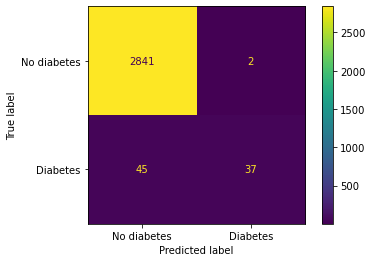

In [186]:
model.analysis()
